**QUESTION NO.1 TABLE OF NUMBER OF MENTIONS**

In [ ]:
!pip install tabulate
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

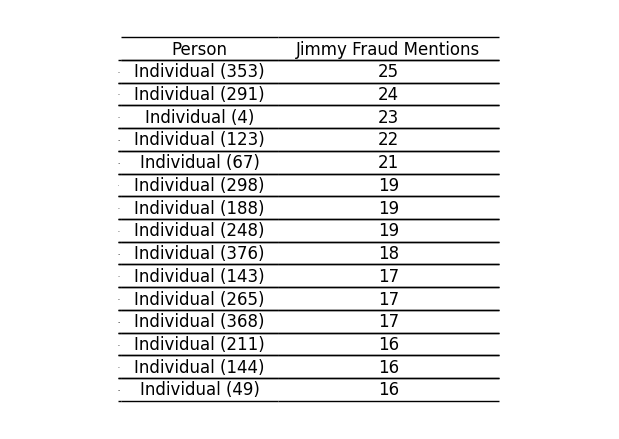

In [3]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Define the folder path which contains the 400 emails
email_folder = 'AssignResubmit/400_emails'

# Initialize a dictionary to count mentions
mention_counts = {}

# Iterate over each file in the email folder
for filename in os.listdir(email_folder):
    if filename.endswith('.txt'):
        # Extract the individual number from the filename
        individual_number = int(re.search(r'\d+', filename).group())

        # Open and read the email content
        with open(os.path.join(email_folder, filename), 'r') as file:
            content = file.read()

        # Count the mentions of "Jimmy Fraud"
        count = content.lower().count('jimmy fraud')

        # Store the count in the dictionary
        mention_counts[individual_number] = count

# Convert the dictionary to a DataFrame
mention_counts_df = pd.DataFrame(list(mention_counts.items()), columns=['Individual', 'Mentions'])

# Filter and sort the DataFrame for individuals with more than 15 mentions
filtered_mentions_df = mention_counts_df[mention_counts_df['Mentions'] > 15].sort_values(by='Mentions', ascending=False)

# Select the top 15 individuals
top_15_mentions_df = filtered_mentions_df.head(15)

# Rename columns to match the desired format
top_15_mentions_df.columns = ['Person', 'Jimmy Fraud Mentions']

# Format the 'Individual' column
top_15_mentions_df['Person'] = top_15_mentions_df['Person'].apply(lambda x: f'Individual ({x})')

# Plot table without the index
fig, ax = plt.subplots(figsize=(10, 6))  # Set the size of the plot
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.set_frame_on(False)  # No visible frame

# Create the table without the index
tab = table(ax, top_15_mentions_df, loc='center', colWidths=[0.2]*len(top_15_mentions_df.columns), cellLoc='center', edges='horizontal')

# Adjust table properties
tab.auto_set_font_size(False)  # Set font size manually
tab.set_fontsize(12)  # Table font size
tab.scale(1.5, 1.5)  # Scale the table size

# Remove the index column in the plot table
tab.auto_set_column_width([0, 1])  # Adjust column width
for key, cell in tab.get_celld().items():
    if key[1] == -1:  # The row index is -1, meaning the index column
        cell.set_text_props(fontsize=0)  # Set font size to 0 to hide index

# Adjust layout to fit table
plt.subplots_adjust(left=0.2, top=0.8, bottom=0.1, right=0.8)

# Show the plot
plt.show()


**QUESTION NO.2 STATISTICS**


In [4]:
# Calculate statistics
total_mentions_count = mention_counts_df['Mentions'].sum()
mean_mentions_count = mention_counts_df['Mentions'].mean()
std_dev_mentions_count = mention_counts_df['Mentions'].std()
min_mentions_count = mention_counts_df['Mentions'].min()
max_mentions_count = mention_counts_df['Mentions'].max()

# Display the statistics with updated phrases and variable names

print(f"Total(Sum) number of mentions: {total_mentions_count}")
print(f"Mean mentions per person: {mean_mentions_count:.2f}")
print(f"Standard deviation of mentions: {std_dev_mentions_count:.2f}")
print(f"Minimum mentions found: {min_mentions_count}")
print(f"Maximum mentions found: {max_mentions_count}")


Total(Sum) number of mentions: 1993
Mean mentions per person: 4.98
Standard deviation of mentions: 4.35
Minimum mentions found: 1
Maximum mentions found: 25




**QUESTION NO.3 HISTOOGRAM**

<ipython-input-5-7c791a6995f4>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Frequency of Mentions')


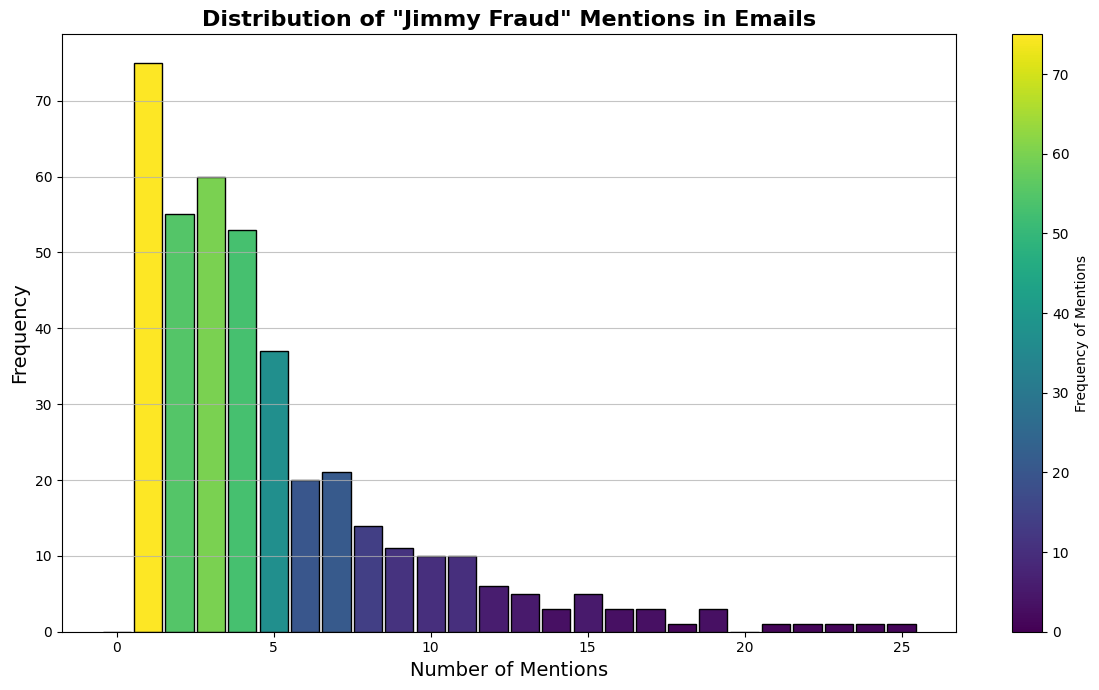

In [5]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the dictionary to a DataFrame
mention_counts_df = pd.DataFrame(list(mention_counts.items()), columns=['Individual', 'Mentions'])

# Create a histogram of the number of mentions
plt.figure(figsize=(12, 7))

# Compute the histogram data
bins = range(0, mention_counts_df['Mentions'].max() + 2)  # Create bins from 0 to max mentions + 1
hist, bin_edges = np.histogram(mention_counts_df['Mentions'], bins=bins)

# Normalize bin heights for color mapping
norm = plt.Normalize(hist.min(), hist.max())
colors = plt.cm.viridis(norm(hist))

# Plot the histogram with gradient colors
bars = plt.bar(bin_edges[:-1], hist, color=colors, edgecolor='black', width=0.9)

# Adding labels and title
plt.title('Distribution of "Jimmy Fraud" Mentions in Emails', fontsize=16, fontweight='bold')
plt.xlabel('Number of Mentions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a color bar for reference
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Frequency of Mentions')

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()


**CODE FOR QUESTION 4**

Number of rows in the given CSV file: 284807
Number of columns in the given CSV file: 22
Test accuracy of the Decision Tree: 1.00


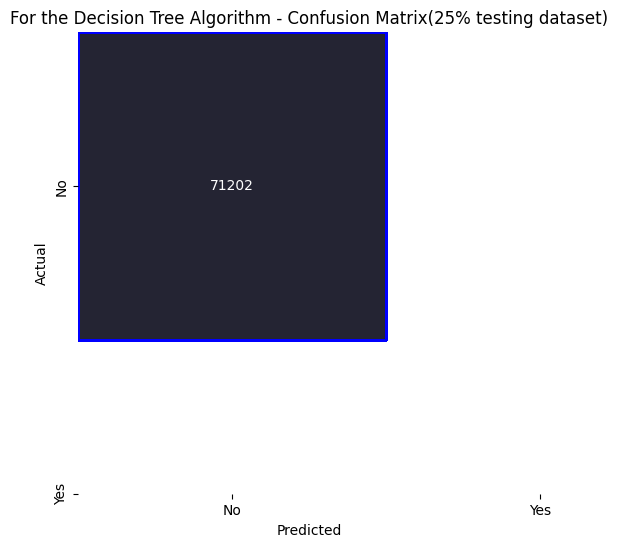

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io

# Path to the ZIP file
zip_file_path = 'AssignResubmit/Jimmy_fraud.zip'  # Replace with your ZIP file path

# Read the CSV file from the ZIP without extracting
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming there's only one CSV file in the ZIP or we know the file name
    csv_file_name = zip_ref.namelist()[0]  # Get the name of the CSV file in the ZIP
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)

# Print the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows in the given CSV file: {num_rows}")
print(f"Number of columns in the given CSV file: {num_columns}")

# Encode 'Defrauded' column: 1 for 'YES' and 0 for 'NO'
df['Defrauded'] = df['Defrauded'].apply(lambda x: 1 if x == 'YES' else 0)

# Separate features and target variable
X = df.drop(columns=['Defrauded'])
y = df['Defrauded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30, stratify=y)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=30)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracy score
print(f'Test accuracy of the Decision Tree: {accuracy_dt:.2f}')

# Function to plot the confusion matrix with a dark color palette
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    cmap = sns.color_palette("dark:blue", as_cmap=True)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False, square=True,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], linewidths=1, linecolor='blue')
    plt.title(f'{title} - Confusion Matrix(25% testing dataset)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(conf_matrix_dt, 'For the Decision Tree Algorithm')


**PART 2 OF QUESTION 4**

Number of rows in the given Dataset: 284807
Number of columns in the given Dataset: 22
Random Forest Accuracy: 1.00


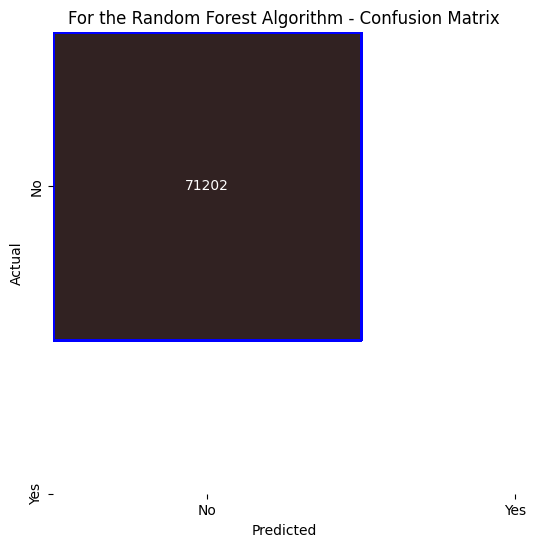

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io

# Path to the ZIP file
zip_file_path = 'AssignResubmit/Jimmy_fraud.zip'  # Update the path if necessary

# Read the CSV file from the ZIP without extracting
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming there's only one CSV file in the ZIP or we know the file name
    csv_file_name = zip_ref.namelist()[0]  # Get the name of the CSV file in the ZIP
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)

# Print the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows in the given Dataset: {num_rows}")
print(f"Number of columns in the given Dataset: {num_columns}")

# Encode 'Defrauded' column: 1 for 'YES' and 0 for 'NO'
df['Defrauded'] = df['Defrauded'].apply(lambda x: 1 if x == 'YES' else 0)

# Separate features and target variable
X = df.drop(columns=['Defrauded'])
y = df['Defrauded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30, stratify=y)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=30)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy score
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Function to plot the confusion matrix with a dark color palette
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    cmap = sns.color_palette("dark:red", as_cmap=True)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False, square=True,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], linewidths=1, linecolor='blue')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(conf_matrix_rf, 'For the Random Forest Algorithm')
